In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set(style="whitegrid")
%matplotlib inline
from pandas import DataFrame, Series
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

The file had to be cleaned up before using it on MacOS

- ```dos2unix airline_tweets.csv```
- ```sed -i 's/,$//' airline_tweets.csv```

After that we can move forward and import it in Pandas

In [2]:
df = pd.read_csv('airline_tweets.csv', encoding = 'utf8')
df.dtypes

tweet_id            int64
tweet_created      object
name               object
tweet_location     object
retweet_count     float64
text               object
dtype: object

In [3]:
df.sample(5)

,tweet_id,tweet_created,name,tweet_location,retweet_count,text
6709,6710,21-2-2015 17:38,courtneyx54,Massachusetts,0.0,@JetBlue Are we able to change to an Even More...
6615,6616,21-2-2015 16:32,BigSho31,NaN,0.0,@SouthwestAir we are trying to fly back from O...
6374,6375,21-2-2015 13:49,MichaelBorakove,NaN,0.0,@JetBlue It is physically impossible to make i...
9145,9146,22-2-2015 16:50,HaileyUrban,NaN,0.0,@AmericanAir all flights Cancelled Flighted to...
8252,8253,22-2-2015 13:01,WarrickHoward,NaN,0.0,@USAirways Please can someone contact me regar...


In [4]:
df['tweet_location'].isnull().sum()

4813

In [5]:
df['text'].isnull().sum()

8

In [6]:
df['retweet_count'].describe().transpose()

count    14608.000000
mean         0.082694
std          0.746508
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         44.000000
Name: retweet_count, dtype: float64

## Starting to clean up the data

Converting all text to lower case and removing the characters the english disctionary does not have. This takes away  the some of the data. We need to remove extra characters like # from the hashtags unless we would like to do an explicit hashtag analyzis.

In case you would like to use non ascii characters in the text  http://stackoverflow.com/a/35723460/127508

- converting text to lowercase
- unicode -> str
- removing # (and potentiall other special characters)



In [7]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
dtype: int64

In [8]:
#Lambdas for cleaning up 
df.count()
asci = lambda s: s.encode('ascii',errors='ignore') if isinstance(s, basestring) else s
lowe = lambda s: s.lower() if isinstance(s, basestring) else s
typ = lambda t: type(t)
df['lower'] = df['text'].apply(lowe)
df['ascii'] = df['lower'].apply(asci)
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@JetBlue's new CEO seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@JetBlue is REALLY getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! 😡�...,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. We waited in line for almost an h...,@united yes. we waited in line for almost an h...,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at IAH on tim...,@united the we got into the gate at iah on tim...,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@SouthwestAir its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...,@southwestair its cool that my bags take a bit...


In [9]:
df[df['text'].isnull()].count()

tweet_id          8
tweet_created     0
name              8
tweet_location    0
retweet_count     0
text              0
lower             0
ascii             0
dtype: int64

In [10]:
df[df['text'].isnull()]

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
678,679,NaN,scatignani,NaN,NaN,NaN,NaN,NaN
2282,2283,NaN,edgarsantana,NaN,NaN,NaN,NaN,NaN
4027,4028,NaN,Mosborne13,NaN,NaN,NaN,NaN,NaN
4199,4200,NaN,ConnieBowman4,NaN,NaN,NaN,NaN,NaN
5628,5629,NaN,ohmal,NaN,NaN,NaN,NaN,NaN
7290,7291,NaN,traceyabbywhite,NaN,NaN,NaN,NaN,NaN
10568,10569,NaN,MrEschatologist,NaN,NaN,NaN,NaN,NaN
13290,13291,NaN,Pride_MMA,NaN,NaN,NaN,NaN,NaN


In [11]:
df.count()

tweet_id          14616
tweet_created     14470
name              14616
tweet_location     9803
retweet_count     14608
text              14608
lower             14608
ascii             14608
dtype: int64

In [12]:
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.dropna(subset=['text'], inplace=True)
df[df['text'].isnull()].count()

tweet_id          0
tweet_created     0
name              0
tweet_location    0
retweet_count     0
text              0
lower             0
ascii             0
dtype: int64

In [13]:
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
text              14608
lower             14608
ascii             14608
dtype: int64

In [14]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,text,lower,ascii
11400,11401,23-2-2015 10:23,DEdzJr,KCMO - University of Missouri,0.0,Why? 😒 RT @JetBlue Our fleet's on fleek. http...,why? 😒 rt @jetblue our fleet's on fleek. http...,why? rt @jetblue our fleet's on fleek. http:/...


In [15]:
#Removing what we don't need
for column in ['lower', 'text']:
    if column in df.columns:
        del df[column]
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
dtype: int64

In [16]:
df.head()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii
0,1,16-2-2015 23:36,JetBlueNews,USA,0.0,@jetblue's new ceo seeks the right balance to ...
1,2,16-2-2015 23:43,nesi_1992,undecided,0.0,@jetblue is really getting on my nerves !! #n...
2,3,16-2-2015 23:48,CPoutloud,Washington. DC,0.0,@united yes. we waited in line for almost an h...
3,4,16-2-2015 23:52,brenduch,NaN,0.0,@united the we got into the gate at iah on tim...
4,5,17-2-2015 0:00,VahidESQ,Los Angeles. CA,0.0,@southwestair its cool that my bags take a bit...


In [17]:
df['len']=df['ascii'].apply(len)
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len
1603,1604,18-2-2015 6:40,fatabdula,NaN,0.0,@united i submitted a status match last week a...,133


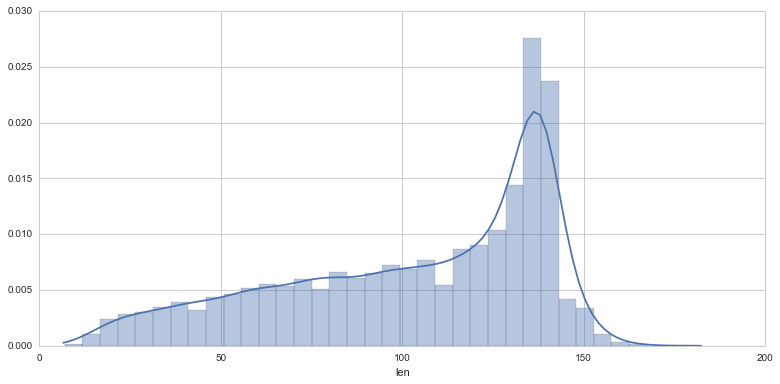

In [18]:
plt.figure(figsize=(13, 6))
sbn.distplot(df['len'])

In [19]:
df[(df.len < 15)]

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len
163,164,NaN,AndreybohdanY,NaN,0.0,@usairways,11
642,643,NaN,phil0616,NaN,0.0,@jetblue,9
661,662,NaN,phil0616,NaN,0.0,@jetblue,9
1191,1192,17-2-2015 18:40,Trufflebaby2,NaN,0.0,@jetblue sent,13
1496,1497,18-2-2015 4:50,philpete,London,0.0,@jetblue deal!,14
1641,1642,NaN,istackfranklins,NaN,0.0,@usairways,11
1676,1677,NaN,istackfranklins,NaN,0.0,@usairways,11
1904,1905,NaN,MusJew2daRescue,NaN,0.0,@usairways,11
2317,2318,18-2-2015 15:24,jesisforlovers,Oahu. Hi,0.0,@united sent,12
2394,2395,NaN,Joshua_Redman,NaN,0.0,@united,8


## Getting airline information

In [20]:
df['airline'] = df['ascii'].str.extract('@(?P<Airline>\w+)', expand=True)
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline
10839,10840,23-2-2015 7:23,ConstanceSCHERE,Boston. MA,0.0,@usairways 4914 from phl to bgm. i cannot beli...,90,usairways


In [21]:
df['airline'].value_counts()

united             3800
usairways          2902
americanair        2748
southwestair       2414
jetblue            2212
virginamerica       503
nrhodes85             2
dadboner              1
deltaassist           1
catfoodbeerglue       1
scm1133               1
lindaswc              1
djevolutionhd         1
vanessaannz           1
ods1819               1
chasefoster           1
sb5551                1
eatgregeat            1
imaginedragons        1
sarahpompei           1
nytimes               1
kciairport            1
shannonwoodward       1
internjohnradio       1
albertbreer           1
mandarinjourney       1
timbennettg3          1
ninadavuluri          1
hillaconlin           1
andrewfallis          1
malhoit               1
melissaafrancis       1
Name: airline, dtype: int64

In [22]:
df['airline_clean'] = df['airline'].str.extract(
    '(usairways|americanair|jetblue|virginamerica|united|usairways|southwestair)', 
    expand=True)
df['airline_clean'].value_counts()

united           3800
usairways        2902
americanair      2748
southwestair     2414
jetblue          2212
virginamerica     503
Name: airline_clean, dtype: int64

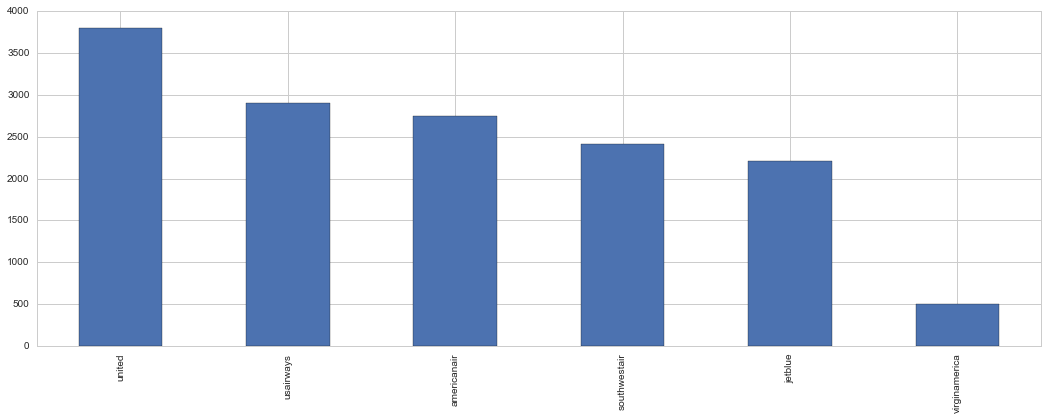

In [23]:
df['airline_clean'].value_counts().plot(kind='bar', stacked=True,figsize=(18,6))

In [24]:
if 'airline' in df.columns:
    del df['airline']  
df['airline_clean'].unique()

array(['jetblue', 'united', 'southwestair', 'usairways', 'virginamerica',
       nan, 'americanair'], dtype=object)

In [25]:
df.head()
df.count()

tweet_id          14608
tweet_created     14470
name              14608
tweet_location     9803
retweet_count     14608
ascii             14608
len               14608
airline_clean     14579
dtype: int64

In [26]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean
614,615,17-2-2015 12:58,Tony_Ciccolella,Brentwood. CA,0.0,@united plus you horrible seating and poor cus...,130,united


Removing @words move hashtags into a new column.

In [27]:
tags = lambda s: [tag.strip("#") for tag in s.split() if tag.startswith("#")]
df['tags'] = df['ascii'].apply(tags)
df.iloc[1010]

tweet_id                                                       1012
tweet_created                                       17-2-2015 16:46
name                                                AshleyMarie_TIU
tweet_location                                        HOOSiER STATE
retweet_count                                                     0
ascii             @southwestair what's up with these delays?! th...
len                                                             131
airline_clean                                          southwestair
tags                                 [southwest, southwestairlines]
Name: 1011, dtype: object

In [28]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags
7849,7850,22-2-2015 10:03,sydlisterney,babynole'18,0.0,@usairways round two of being the worst airlin...,53,usairways,[]


In [29]:
urls = lambda s: [url for url in s.split() if url.startswith("http://")]
df['urls'] = df['ascii'].apply(urls)
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii             @jetblue i would love for you to fly my best f...
len                                                             102
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [30]:
df['ascii'] = df['ascii'].str.replace('(\.)?@(?P<Airline>\w+)', '')
df['ascii'] = df['ascii'].str.replace('#(?P<Tag>\w+)', '')
df['ascii'] = df['ascii'].str.replace('http://t.co/(?P<Url>\w+)', '')
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls
1868,1869,18-2-2015 9:49,seanpetykowski,Austin. TX,0.0,just added support to their ios application!...,136,southwestair,[passbook],[http://t.co/lednocdqee]


In [31]:
df.iloc[521]

tweet_id                                                        522
tweet_created                                       17-2-2015 12:03
name                                                somekidnamedjon
tweet_location                                                 ✈️✈️
retweet_count                                                     0
ascii              i would love for you to fly my best friend ho...
len                                                             102
airline_clean                                               jetblue
tags                                                             []
urls                                       [http://t.co/ch0nmjymgh]
Name: 521, dtype: object

In [32]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls
6430,6431,21-2-2015 14:17,jcharvardapp,NaN,0.0,no bag tagging. led to many people backing up...,82,united,[],[]


## Tweets with most hashtags

In [33]:
df['ctags'] = df['tags'].apply(len)

In [34]:
df.sample()

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags
4973,4974,20-2-2015 13:32,bretlonder,San Diego. CA,0.0,it's worth saying that. if you litter in sing...,110,united,[],[],0


Sorting by count

In [35]:
df.sort_values(by='ctags').tail(3)

,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags
4839,4840,20-2-2015 11:57,southxnortheast,key west to bar harbor,2.0,saving my sanity. leaving it behind for sunsh...,135,jetblue,"[escape, fl, bliss, travel, indenial, whatfroz...",[http://t.co/6ttzejv3hy],6
8163,8164,22-2-2015 12:35,livingfitly,Washington. DC,0.0,home to in' back to !,116,virginamerica,"[flight, dc, sunset, globe, backtowinter, work...",[http://t.co/vx9vbctdlf],7
4416,4417,20-2-2015 7:49,SMHillman,New York. NY,0.0,gr8 crew on 123 to they're,115,jetblue,"[mint, flight, lax, mintalicious, truebluelove...",[],8


## Cleaning up tags

There is a lots of things we can remove from tags, starting with the airline names and the character "."

In [36]:
tt = df[df['ctags'] != 0]
ll = tt.tags.values.tolist()
llt = [item for sublist in ll for item in sublist]
llt = filter(lambda x: len(x)>0, llt)
r = re.compile('(jetblue|unitedairlines|usairways|united|americanairlines|\.)')
llt = [item for item in llt if not r.match(item)]

Using the new collection module from Python.

In [37]:
from collections import Counter
c = Counter(llt)
c.most_common(15)

[('destinationdragons', 76),
 ('fail', 63),
 ('customerservice', 34),
 ('neveragain', 26),
 ('disappointed', 23),
 ('avgeek', 22),
 ('travel', 21),
 ('badservice', 20),
 ('help', 19),
 ('badcustomerservice', 18),
 ('frustrated', 17),
 ('nothappy', 14),
 ('flyingitforward', 12),
 ('epicfail', 12),
 ('thankyou', 10)]

Generating tags by airline, using a simple function for cleaning up the data.

In [38]:
def gen_airline_tags(airline):
    tags = df[(df['ctags'] != 0) & (df['airline_clean'] == airline)].tags.values.tolist()
    #flatten
    llist = [item for sublist in tags for item in sublist]
    llist = filter(lambda x: len(x)>0, llist)
    r = re.compile('(jetblue|unitedairlines|usairways|united|americanairlines|virginamerica|\.)')
    llist = [item for item in llist if not r.match(item)]
    return llist

In [39]:
usairways_tags     = gen_airline_tags('usairways')
united_tags        = gen_airline_tags('united')              
americanair_tags   = gen_airline_tags('americanair')
southwestair_tags  = gen_airline_tags('southwestair')
jetblue_tags       = gen_airline_tags('jetblue')
virginamerica_tags = gen_airline_tags('virginamerica')  

ua_c = Counter(virginamerica_tags)
ua_c.most_common(15)

[('help', 4),
 ('cheapflights', 4),
 ('farecompare', 4),
 ('oscars2015', 3),
 ('oscars', 3),
 ('middleeast', 3),
 ('disappointed', 2),
 ('mayweatherpacquiao', 2),
 ('sanfrancisco', 2),
 ('austin', 2),
 ('moodlitmonday', 2),
 ('flight', 2),
 ('sciencebehindtheexperience', 2),
 ('dallas', 2),
 ('travel', 2)]

['tags', 'usairways_tags']


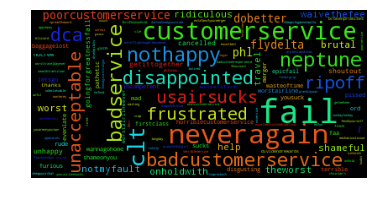

['united_tags', 'tags']


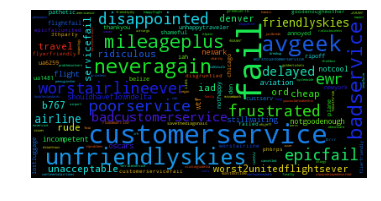

['americanair_tags', 'tags']


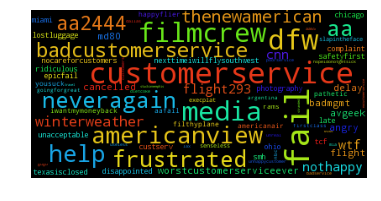

['southwestair_tags', 'tags']


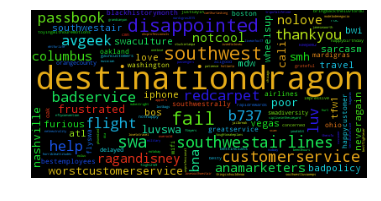

['jetblue_tags', 'tags']


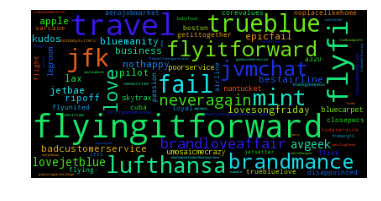

['virginamerica_tags', 'tags']


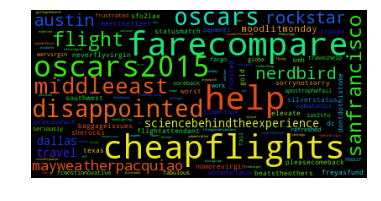

In [40]:
from wordcloud import WordCloud

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def gen_wc(tags):
    wc = WordCloud(max_font_size=40, relative_scaling=.5).generate(' '.join(tags))
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    
tags_list = [usairways_tags, united_tags, americanair_tags, southwestair_tags, jetblue_tags, virginamerica_tags]

for tags in tags_list:
    n = namestr(tags, globals())
    print n
    gen_wc(tags)

## Using CoreNLP


Code for Deeply Moving: Deep Learning for Sentiment Analysis

http://stanfordnlp.github.io/CoreNLP/

http://nlp.stanford.edu/sentiment/code.html

In [41]:
df.to_csv('lines.csv', encoding='utf-8')

CoreNLP processing happens

In [155]:
df2 = pd.read_csv('out.csv', encoding = 'utf8')
df2.sample()

,Unnamed: 0,tweet_id,tweet_created,name,tweet_location,retweet_count,ascii,len,airline_clean,tags,urls,ctags,sentiment
9531,9537,9538,22-2-2015 18:20,NickyAmberJones,Earth,1.0,why won't you help me get my luggage back? i'...,120,usairways,"[flight5182, usairways]",[],2,1


In [163]:
df2=df2[['sentiment', 'airline_clean', 'tweet_id']]
df2.sample()

,sentiment,airline_clean,tweet_id
790,2,southwestair,792


In [164]:
df2.groupby(['airline_clean','sentiment']).size()

airline_clean  sentiment
americanair    -1             14
                0             36
                1           1804
                2            722
                3            171
                4              1
jetblue        -1              2
                0              7
                1           1074
                2            868
                3            250
                4             11
southwestair   -1              4
                0             20
                1           1320
                2            829
                3            237
                4              4
united         -1              7
                0             74
                1           2467
                2           1026
                3            221
                4              5
usairways      -1              5
                0             62
                1           1962
                2            716
                3            155
                4 

In [165]:
airlines = ['usairways', 'united', 'americanair', 'southwestair', 'jetblue', 'virginamerica']

def group_by_sentiment(airline):
    return df2[(df2.airline_clean == airline)].groupby(['sentiment']).size().to_frame(name='count')

airlines_c = [ group_by_sentiment(airline) for airline in airlines]


def percentage_for_count(df_c):
    df_c['perc']=100*(df_c['count']/df_c['count'].sum())
    return 'ok'

[percentage_for_count(a_c) for a_c in airlines_c]
[a_c.reset_index(inplace=True) for a_c in airlines_c]

airlines_c[0]

,sentiment,count,perc
0,-1,5,0.172295
1,0,62,2.136458
2,1,1962,67.608546
3,2,716,24.672640
4,3,155,5.341144
5,4,2,0.068918


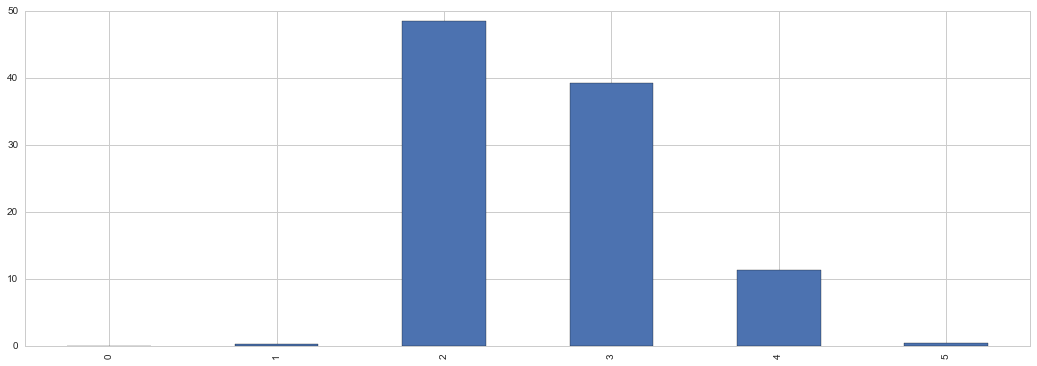

In [166]:
#'usairways'
airlines_c[4]['perc'].plot(kind='bar', stacked=True,figsize=(18,6))

In [175]:
N = 100

## generate toy data
ind = np.random.choice(['retail','construction','information'], N)
cty = np.random.choice(['cooltown','mountain pines'], N)
age = np.random.choice(['young','old'], N)
jobs = np.random.randint(low=1,high=250,size=N)

## prep data frame
df_city = pd.DataFrame({'industry':ind,'city':cty,'jobs':jobs,'age':age})
df_city_grouped = df_city.groupby(['city','industry','age']).sum()
df_city_grouped

jobs
city           industry     age        
cooltown       construction old     996
                            young   549
               information  old     968
                            young  1437
               retail       old     871
                            young   540
mountain pines construction old     853
                            young  1268
               information  old    1335
                            young  1104
               retail       old     787
                            young   774

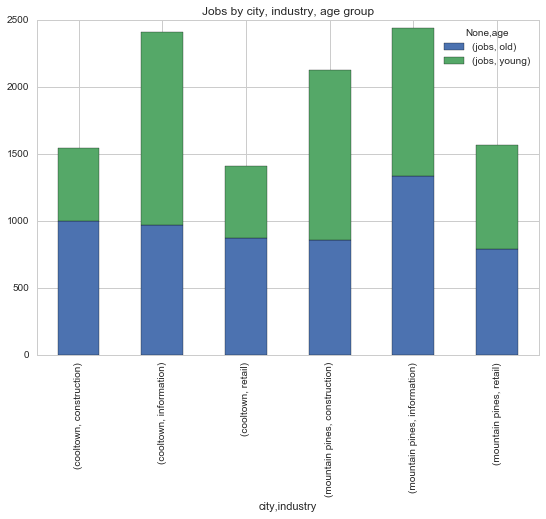

In [176]:
df_city_grouped.unstack().plot(kind='bar',stacked=True,figsize=(9, 6),title='Jobs by city, industry, age group')

In [174]:
df2_grouped = df2.groupby(['airline_clean','sentiment']).count()
df2_grouped

tweet_id
airline_clean sentiment          
americanair   -1               14
               0               36
               1             1804
               2              722
               3              171
               4                1
jetblue       -1                2
               0                7
               1             1074
               2              868
               3              250
               4               11
southwestair  -1                4
               0               20
               1             1320
               2              829
               3              237
               4                4
united        -1                7
               0               74
               1             2467
               2             1026
               3              221
               4                5
usairways     -1                5
               0               62
               1             1962
               2              716
               3              155
               4                2
virginamerica -1                2
               0                2
               1              250
               2              180
               3               69

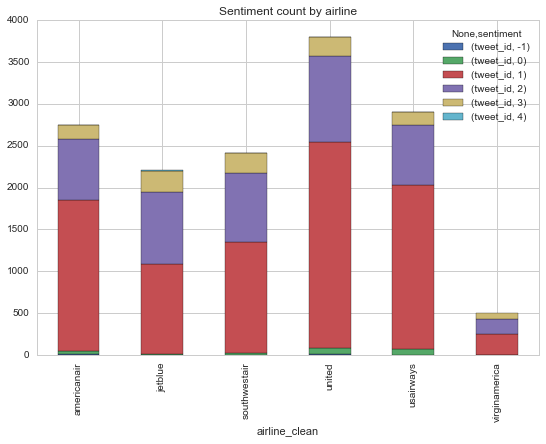

In [178]:
df2_grouped.unstack().plot(kind='bar',stacked=True,figsize=(9, 6),title='Sentiment count by airline')

In [240]:
#df['Percent'] = df.groupby('Localization')['Size'].transform(lambda x: x/sum(x))
df3 = df2.groupby(['airline_clean','sentiment']).count()
df3.reset_index(inplace=True)
df3.rename(columns={'tweet_id': 'tweet_count'}, inplace=True)
df3

,airline_clean,sentiment,tweet_count
0,americanair,-1,14
1,americanair,0,36
2,americanair,1,1804
3,americanair,2,722
4,americanair,3,171
5,americanair,4,1
6,jetblue,-1,2
7,jetblue,0,7
8,jetblue,1,1074
9,jetblue,2,868


In [239]:
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
               'office_id': list(range(1, 7)) * 2,
               'sales': [np.random.randint(100000, 999999) for _ in range(12)]})
df

,office_id,sales,state
0,1,405711,CA
1,2,535829,WA
2,3,217952,CO
3,4,252315,AZ
4,5,982371,CA
5,6,459783,WA
6,1,404137,CO
7,2,222579,AZ
8,3,710581,CA
9,4,548242,WA


In [238]:
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
state_office
#state = df.groupby(['state']).agg({'sales': 'sum'})
#state_office.div(state, level='state') * 100

sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581
      5          982371
CO    1          404137
      3          217952
      5          474564
WA    2          535829
      4          548242
      6          459783

In [247]:
airline_sentiment = df3.groupby(['airline_clean', 'sentiment']).agg({'tweet_count': 'sum'})
airline = df3.groupby(['airline_clean']).agg({'tweet_count': 'sum'})
p = airline_sentiment.div(airline, level='airline_clean') * 100

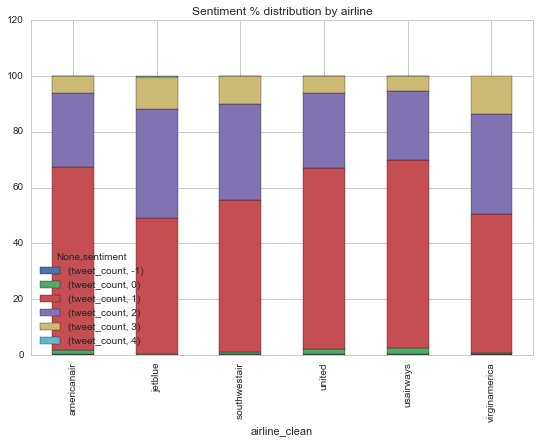

In [248]:
p.unstack().plot(kind='bar',stacked=True,figsize=(9, 6),title='Sentiment % distribution by airline')